In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB

import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')

In [32]:
data_path = ("Data/sentiment labelled sentences/amazon_cells_labelled.txt")
amazon_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon_raw_df.columns = ['MESSAGE', 'SPAM']

In [33]:
keywords = ['disappointed', 'not', "doesn't", "problems", "waste", 'broke', 'poor']

for key in keywords:
    amazon_raw_df[str(key)] = amazon_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

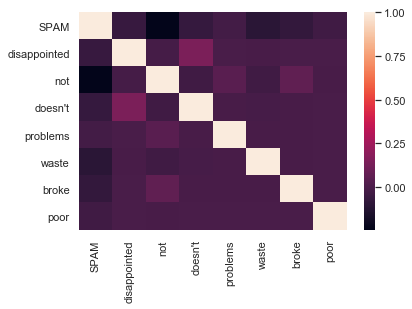

In [35]:
sns.heatmap(amazon_raw_df.corr())

In [36]:
data = amazon_raw_df[keywords]
target = amazon_raw_df['SPAM']

In [37]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 402


## Trying the model on a different data set

In [38]:
data_path = ("Data/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw_df = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw_df.columns = ['MESSAGE', 'SPAM']

In [39]:
keywords = ['disappointed', 'not', "doesn't", "problems", "waste", 'broke', 'poor']

for key in keywords:
    yelp_raw_df[str(key)] = yelp_raw_df.MESSAGE.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [40]:
data = yelp_raw_df[keywords]
target = yelp_raw_df['SPAM']

In [41]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 415


The features were selcted based on intuition and a perusal of the data.  The model was ~60% accurate on both data sets. 